In [1]:
import ast
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

Text(0.4, 0.4, '$\\phi_i(v) := U_{A,D_{val}}(D)-U_{A,D_{val}}(D/\\{z\\})$')

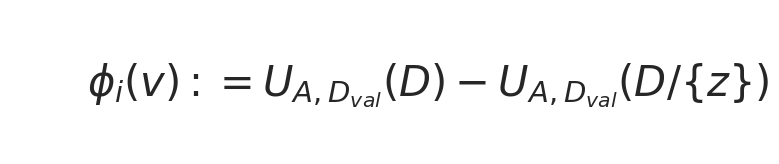

In [2]:

##### LOO Value Formula #####

a = r'\phi_i(v) := U_{A,D_{val}}(D)-U_{A,D_{val}}(D/\{z\})'
ax = plt.axes([0,0,0.3,0.3]) #left,bottom,width,height
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
plt.text(0.4,0.4,'$%s$' %a,size=30)

In [3]:
data_path = 'D:/MyGraduate/code/diffusion_shapely_value/data/LOO_compositions_orsize.csv'
data_path_resolve = Path(data_path).resolve()
data_raw = pd.read_csv(data_path_resolve)
data_raw

,no.,element,SSIM,Cosin,Histogram,DHash,RGBSSIM,FID
0,mona_lisa_g10,"stablydiffusedsMagnum__ v10,controlNet,da Leon...",0.045524,0.857449,4.169434,9,0.971706,180.413378
1,mona_lisa_g5,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",0.094943,0.822053,6.391890,17,0.936643,246.351725
2,mona_lisa_g6,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",0.097085,0.908829,5.800169,15,0.996269,227.704668
3,mona_lisa_g7,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",0.097019,0.821175,6.271106,16,0.932389,258.003671
4,mona_lisa_g8,"stableDiffusion-pruned-v-1-5,controlNet,mona_l...",0.035946,0.873655,7.655917,24,0.976944,294.336787
5,mona_lisa_g9,"stableDiffusion-pruned-v-1-5,da Leonardo da vi...",0.060659,0.889124,3.627409,21,0.947707,245.534335


In [4]:
columns = ['element', 'FID']
# columns = ['element', 'DHash']
# columns = ['element', 'Histogram']
# columns = ['element', 'Cosin']
data = data_raw[columns].copy()

def add_start_absorbing_state_func(conversion, path):
    path = ast.literal_eval(path)

    return path

def get_pure_ssim_func(value, models_value, x):
    return value - models_value


# data['combinations'] = data.apply(lambda x: add_start_absorbing_state_func(x['SSIM'], x['element']), axis = 1)

data['PFID'] = data.apply(lambda x: get_pure_ssim_func(x['FID'], data['FID'][1], x), axis = 1)
# data['PDHash'] = data.apply(lambda x: get_pure_ssim_func(x['DHash'], data['DHash'][0], x), axis = 1)
# data['PHistogram'] = data.apply(lambda x: get_pure_ssim_func(x['Histogram'], data['Histogram'][0], x), axis = 1)
# data['PCosin'] = data.apply(lambda x: get_pure_ssim_func(x['Cosin'], data['Cosin'][0], x), axis = 1)
data

,element,FID,PFID
0,"stablydiffusedsMagnum__ v10,controlNet,da Leon...",180.413378,-65.938347
1,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",246.351725,0.000000
2,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",227.704668,-18.647057
3,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",258.003671,11.651946
4,"stableDiffusion-pruned-v-1-5,controlNet,mona_l...",294.336787,47.985062
5,"stableDiffusion-pruned-v-1-5,da Leonardo da vi...",245.534335,-0.817389


In [5]:
data_lvl1 = data[['element', 'PFID']].sort_values(by=['PFID'])
# data_lvl1 = data[['element', 'PDHash']].sort_values(by=['PDHash'])
# data_lvl1 = data[['element', 'PHistogram']].sort_values(by=['PHistogram'])
# data_lvl1 = data[['element', 'PCosin']].sort_values(by=['PCosin'])
# second level - groupby userid, concat distinct marketing channel and label if any conversion took place with this channel mix
data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
    {'element': lambda x: ','.join(map(str, x.unique())),
     'PFID': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PDHash': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PHistogram': max})
# data_lvl2 = data_lvl1.groupby(['element'], as_index=False).agg(
#     {'element': lambda x: ','.join(map(str, x.unique())),
#      'PCosin': max})

data_lvl2

,element,PFID
0,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",11.651946
1,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",-18.647057
2,"stableDiffusion-pruned-v-1-5,controlNet,da Leo...",0.000000
3,"stableDiffusion-pruned-v-1-5,controlNet,mona_l...",47.985062
4,"stableDiffusion-pruned-v-1-5,da Leonardo da vi...",-0.817389
5,"stablydiffusedsMagnum__ v10,controlNet,da Leon...",-65.938347


In [6]:
def find_row(df, chanel_name, conv_name):

    for index, data_row in df.iterrows():
        if data_row[conv_name] == 0:
            elements = str(data_row[chanel_name])
            ele_list = elements.split(",")
            return ele_list

In [7]:
def calculate_LOO(df, chanel_name, conv_name):
    ele_list1 = find_row(df, chanel_name, conv_name)
    print(ele_list1)
    for index, data_row in df.iterrows():
        if data_row[conv_name] != 0:
            elements2 = str(data_row[chanel_name])
            ele_list2 = elements2.split(",")
            print(ele_list2)
            attribute_key = list(set(ele_list2).difference(set(ele_list1)))
            attribute_value = -data_row[conv_name]
            print(attribute_key, attribute_value)
            # print(attribute_key, attribute_value)

In [8]:

LOO_dict = calculate_LOO(data_lvl2, 'element', 'PFID')

LOO_dict

['stableDiffusion-pruned-v-1-5', 'controlNet', 'da Leonardo da vinci', 'mona_lisa', 'Lora:wjqLeonardo:1']
['stableDiffusion-pruned-v-1-5', 'controlNet', 'da Leonardo da vinci', 'Lora:wjqLeonardo:1']
[] -11.651945924954873
['stableDiffusion-pruned-v-1-5', 'controlNet', 'da Leonardo da vinci', 'mona_lisa']
[] 18.647057093394523
['stableDiffusion-pruned-v-1-5', 'controlNet', 'mona_lisa', 'Lora:wjqLeonardo:1']
[] -47.985061962512304
['stableDiffusion-pruned-v-1-5', 'da Leonardo da vinci', 'mona_lisa', 'Lora:wjqLeonardo:1']
[] 0.8173894770882839
['stablydiffusedsMagnum__ v10', 'controlNet', 'da Leonardo da vinci', 'mona_lisa', 'Lora:wjqLeonardo:1']
['stablydiffusedsMagnum__ v10'] 65.93834698128208
